#  Инициализация весов нейронных сетей. Способы регуляризации нейронных сетей. Продвинутые алгоритмы градиентного спуска.

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/nn.init.html
* https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/
* https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/
* https://pytorch.org/docs/stable/optim.html

## Задачи для совместного разбора

1\. Инициализируйте веса полносвязного слоя единицами, а смещения - нулями.

In [ ]:
import torch as th
import torch.nn as nn

In [ ]:
fc = nn.Linear(in_features=10, out_features=5)

In [ ]:
fc.weight

Parameter containing:
tensor([[-0.0679, -0.2043,  0.1123, -0.0232, -0.2623, -0.0754, -0.1071,  0.2782,
         -0.2878, -0.0448],
        [-0.1882,  0.2098,  0.1728, -0.2269,  0.0917,  0.1753,  0.0745,  0.2133,
          0.1855, -0.1607],
        [ 0.2474,  0.2294,  0.1368,  0.1573, -0.1699,  0.0333, -0.2995, -0.0973,
          0.1232, -0.1273],
        [ 0.1295,  0.0839, -0.1546,  0.0962, -0.0909, -0.2606,  0.2763, -0.2381,
         -0.2304, -0.1036],
        [ 0.0532,  0.2704,  0.3052,  0.0590,  0.0111, -0.2669, -0.0203,  0.0636,
         -0.0576, -0.2106]], requires_grad=True)

In [ ]:
#fc.weight = th.ones_like(fc.weight)

In [ ]:
fc.weight.data = th.ones_like(fc.weight)

In [ ]:
nn.init.ones_(fc.weight)

Parameter containing:
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], requires_grad=True)

In [ ]:
fc.weight

Parameter containing:
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], requires_grad=True)

2\. Изучите, как работает слой `nn.Dropout` в режиме обучения модели и в режиме использования модели.

In [ ]:
from sklearn.datasets import make_regression
import torch as th

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5, random_state=42)
X = th.FloatTensor(X)
y = th.FloatTensor(y)

In [ ]:
class FullyConnectedNet(nn.Module):
  def __init__(self, n_inputs, n_hidden, n_out):
    super().__init__()
    self.fc1 = nn.Linear(in_features=n_inputs, out_features=n_hidden)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(in_features=n_hidden, out_features=n_out)
  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

In [ ]:
net1 = FullyConnectedNet(n_inputs=4, n_hidden=10, n_out=1)

In [ ]:
net1.parameters()

<generator object Module.parameters at 0x7dfc7e294040>

In [ ]:
n_inputs, n_hidden, n_out = 4, 10, 1
net2 = nn.Sequential(
    nn.Linear(in_features=n_inputs, out_features=n_hidden),
    nn.ReLU(),
    nn.Linear(in_features=n_hidden, out_features=n_out)
)


In [ ]:
#net2(X)

In [ ]:
X = th.randn(size=(5, 5))

In [ ]:
dropout = nn.Dropout(p=0.5)

In [ ]:
dropout(X)

tensor([[ 0.0000e+00,  1.7947e+00, -1.3946e+00, -0.0000e+00,  0.0000e+00],
        [-2.9693e+00, -0.0000e+00, -0.0000e+00, -2.7338e+00, -2.4392e+00],
        [ 2.9122e-03, -0.0000e+00,  0.0000e+00,  0.0000e+00, -2.3868e+00],
        [-0.0000e+00, -0.0000e+00,  1.0321e+00, -0.0000e+00,  2.4640e+00],
        [ 2.9343e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -1.3472e+00]])

In [ ]:
dropout.eval()

Dropout(p=0.5, inplace=False)

In [ ]:
dropout(X)

tensor([[ 1.3407e-01,  8.9734e-01, -6.9729e-01, -3.0861e-01,  2.3082e+00],
        [-1.4847e+00, -8.6727e-01, -1.6826e+00, -1.3669e+00, -1.2196e+00],
        [ 1.4561e-03, -4.4580e-01,  5.3450e-01,  5.9705e-01, -1.1934e+00],
        [-6.0797e-01, -4.4927e-01,  5.1604e-01, -8.5561e-01,  1.2320e+00],
        [ 1.4671e+00, -3.4977e+00, -1.3951e+00, -1.4336e+00, -6.7360e-01]])

In [ ]:
dropout.train()

Dropout(p=0.5, inplace=False)

In [ ]:
dropout(X)

tensor([[ 0.0000,  0.0000, -0.0000, -0.0000,  0.0000],
        [-0.0000, -0.0000, -0.0000, -0.0000, -2.4392],
        [ 0.0000, -0.0000,  1.0690,  0.0000, -0.0000],
        [-0.0000, -0.0000,  1.0321, -0.0000,  2.4640],
        [ 0.0000, -6.9953, -2.7903, -0.0000, -0.0000]])

In [ ]:
class FullyConnectedNet(nn.Module):
  def __init__(self, n_inputs, n_hidden, n_out, p=0.5):
    super().__init__()
    self.fc1 = nn.Linear(in_features=n_inputs, out_features=n_hidden)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(in_features=n_hidden, out_features=n_out)
    self.dropout = nn.Dropout(p=p)

  def forward(self, x):
    out = self.fc1(X)
    out = self.relu(out)
    out = self.dropout(out)
    out = self.fc2(out)
    return out

In [ ]:
from sklearn.datasets import make_regression
import torch as th

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5, random_state=42)
X = th.FloatTensor(X)
y = th.FloatTensor(y)

In [ ]:
net1 = FullyConnectedNet(n_inputs=4, n_hidden=10, n_out=1)

In [ ]:
out = net1(X)

3\. Изучите, как работает слой `nn.BatchNorm1d` в режиме обучения модели и в режиме использования модели.

In [ ]:
bn = nn.BatchNorm1d(num_features=4)

In [ ]:
X.shape

torch.Size([100, 4])

In [ ]:
out = bn(X)
out.mean(dim=0), out.std(dim=0)

(tensor([ 1.1921e-09,  9.5367e-09,  2.3842e-09, -5.9605e-09],
        grad_fn=<MeanBackward1>),
 tensor([1.0050, 1.0050, 1.0050, 1.0050], grad_fn=<StdBackward0>))

In [ ]:
bn.running_mean

tensor([ 0.0043,  0.0083,  0.0064, -0.0019])

In [ ]:
bn.running_var

tensor([1.0171, 0.9933, 0.9823, 0.9532])

In [ ]:
bn.eval()

BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [ ]:
class FullyConnectedNet(nn.Module):
  def __init__(self, n_inputs, n_hidden, n_out, p=0.5):
    super().__init__()
    self.fc1 = nn.Linear(in_features=n_inputs, out_features=n_hidden)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(in_features=n_hidden, out_features=n_out)
    self.bn1 = nn.BatchNorm1d(num_features=n_hidden)

  def forward(self, x):
    out = self.fc1(X)
    out = self.relu(out)
    out = self.bn1(out)
    out = self.fc2(out)
    return out

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Расширьте класс `torch.nn.Linear`, описав класс `InitializedLinear` и добавив возможность инициализировать веса слоя при помощи функций из пакета `torch.nn.init`. Обратите внимание, что данные функции имеют дополнительные параметры. Данные параметры должны передаваться в момент создания объекта класса `InitializedLinear`.

Пример создания слоя:
```
InitializedLinear(n_features, n_hidden, init_f=nn.init.uniform_, init_args={"a": 0.0, "b": 1.0})
```

- [ ] Проверено на семинаре

In [ ]:
import torch as th
import torch.nn as nn

In [ ]:
from sklearn.datasets import make_regression
import torch as th

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5, random_state=42)

In [ ]:
class InitializedLinear(nn.Linear):
  def __init__(self,n_features, n_hidden,init_f=nn.init.normal_, init_args={}):
    super().__init__(n_features, n_hidden)
    init_f(self.weight, **init_args)

In [ ]:
a = InitializedLinear(n_features=3, n_hidden=3, init_f=nn.init.uniform_, init_args={"a": 0.0, "b": 1.0})

In [ ]:
a.weight

Parameter containing:
tensor([[0.8152, 0.1885, 0.6461],
        [0.4661, 0.7258, 0.8565],
        [0.0175, 0.6290, 0.4313]], requires_grad=True)

In [ ]:
a = InitializedLinear(n_features=3, n_hidden=3, init_f=nn.init.ones_)

In [ ]:
a.weight

Parameter containing:
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)

<p class="task" id="2"></p>

2\. Решите задачу регрессии несколько раз, изменяя способ инициализации весов. Рассмотрите следующие варианты:
* `nn.init.uniform_`
* `nn.init.normal_`
* `nn.init.constant_`
* `nn.xavier_uniform_`
* `nn.kaiming_uniform_`

Визуализируйте график изменения значений MSE с ходом эпох. Дайте кривым, соответствующие разным способам инициализации, различные цвета и добавьте подписи. Для улучшения читаемости графиков можно рассматривать области экстремальных значений отдельно.

![image.png](attachment:image.png)

- [ ] Проверено на семинаре

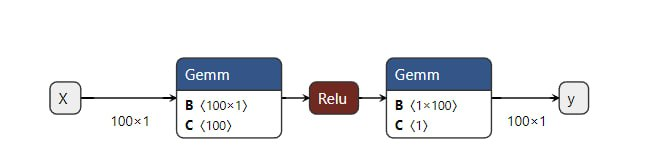

In [ ]:
import torch as th
X = th.linspace(0, 1, 100).view(-1, 1)
y = th.sin(2 * th.pi * X) + 0.1 * th.rand(X.size())

In [ ]:
X.shape

torch.Size([100, 1])

In [ ]:
inizialization = [(nn.init.uniform_, {'a':0, 'b':1}),
                  (nn.init.normal_, {'mean':0, 'std':1}),
                  (nn.init.constant_, {'val':0.5}),
                  (nn.init.xavier_uniform_, ),
                  (nn.init.kaiming_uniform_, )]

In [ ]:
import torch.optim as optim

In [ ]:
n_epochs = 30
gamma = 0.01
crit = nn.MSELoss()
errors = []

for initi in inizialization:
  error_per_model = []
  model = nn.Sequential(
      InitializedLinear(X.shape[1], 100, *initi),
      nn.ReLU(),
      InitializedLinear(100, 1, *initi)
    )

  optimizer = optim.SGD(model.parameters(), lr=gamma)
  for epoch in range(n_epochs):
    y_pred = model(X)
    loss = crit(y_pred, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    error_per_model.append(loss.item())
  errors.append(error_per_model)

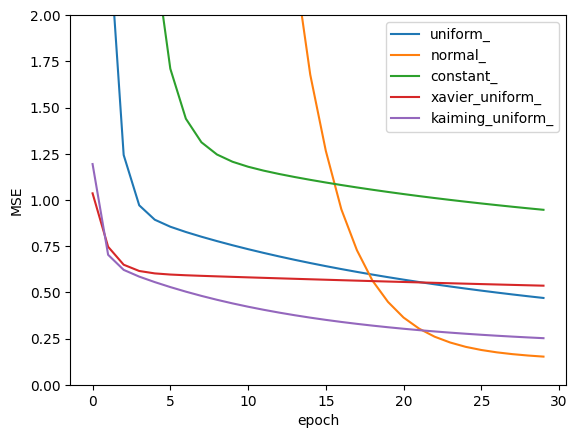

In [ ]:
import matplotlib.pyplot as plt

for e in errors:
  plt.plot(e)
  plt.ylim([0, 2])
plt.legend(['uniform_', 'normal_', 'constant_', 'xavier_uniform_', 'kaiming_uniform_'])
plt.xlabel('epoch')
plt.ylabel('MSE');

<p class="task" id="3"></p>

3\. Исследуйте, как добавление дропаута влияет на процесс обучения модели. Решите задачу регрессии несколько раз, изменяя значения вероятности дропаута $p$ от 0 до 0.8. В качестве модели рассмотрите нейронную сеть с одним скрытым слоем.

Визуализируйте график изменения значений $R^2$ в зависимости от вероятности дропаута $p$ на обучающей и тестовой выборке. Визуализируйте на отдельном графике зависимости разности между $R^2$ на обучающей выборки и $R^2$ на тестовой выборке.

![image.png](attachment:image.png)

- [ ] Проверено на семинаре

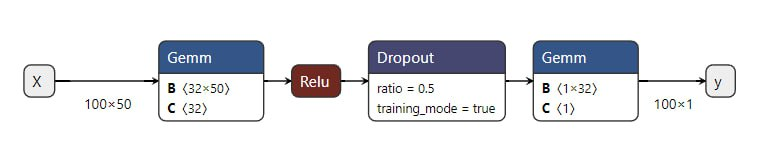

In [ ]:
from sklearn.datasets import make_regression
import torch as th

th.manual_seed(42)
X, y, coef = make_regression(
    n_samples=100,
    n_features=50,
    n_informative=20,
    noise=2,
    coef=True,
    random_state=42,

)
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)

In [ ]:
from sklearn.model_selection import  train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
probs = [0.1, 0.3, 0.5, 0.8]
r2_train_list, r2_test_list = [], []
crit = nn.MSELoss()
n_epochs = 40
gamma = 0.001
for p in probs:
  r2_per_model_train, r2_per_model_test = [], []
  model = nn.Sequential(
      nn.Linear(X.shape[1], 32),
      nn.ReLU(),
      nn.Dropout(p=p),
      nn.Linear(32, 1)
  )

  optimizer = optim.SGD(model.parameters(), lr=gamma)
  for epoch in range(n_epochs):
    y_pred = model(X_train)
    loss = crit(y_pred, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    r2_train = r2_score(y_train.detach().numpy(), y_pred.detach().numpy())
    r2_per_model_train.append(r2_train)
    model.eval()
    y_pred_test = model(X_test)
    r2_test = r2_score(y_test.detach().numpy(), y_pred_test.detach().numpy())
    r2_per_model_test.append(r2_test)
    model.train()
  r2_train_list.append(r2_per_model_train)
  r2_test_list.append(r2_per_model_test)

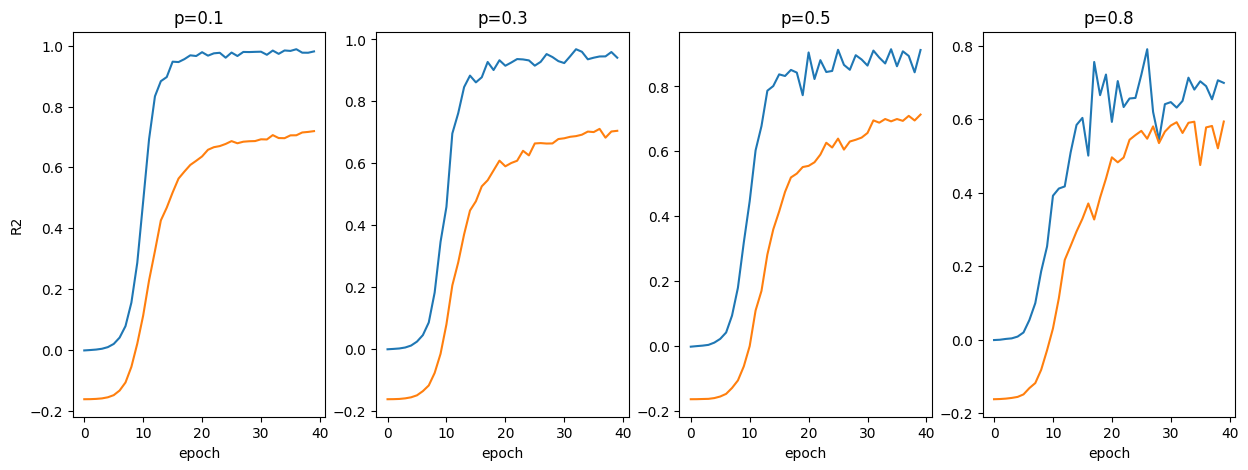

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4,  figsize=(15, 5))
axs[0].set_ylabel('R2')
for i in range(4):
  axs[i].plot(r2_train_list[i])
  axs[i].plot(r2_test_list[i])
  axs[i].set_title(f'p={probs[i]}')
  axs[i].set_xlabel('epoch')


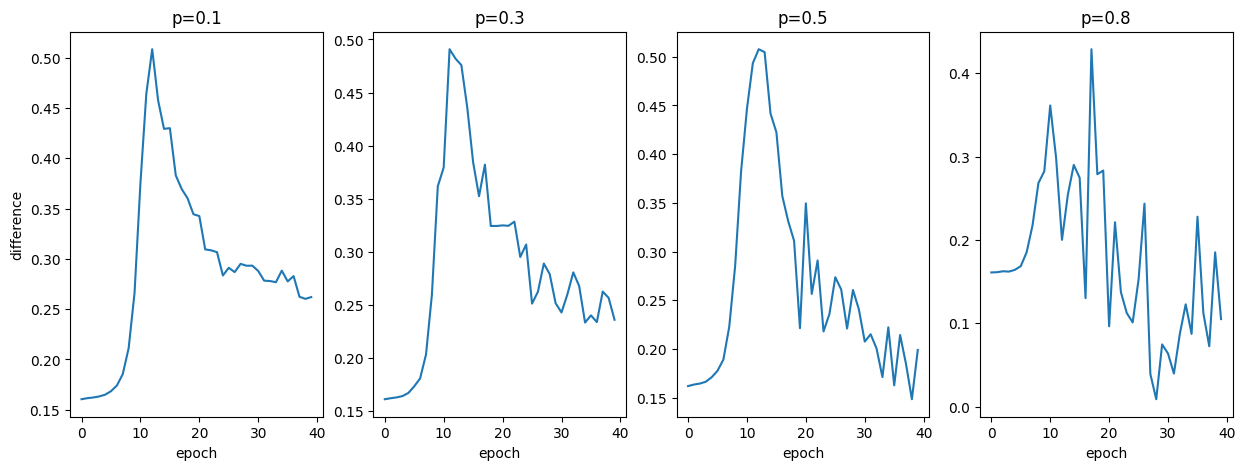

In [ ]:
import numpy as np
fig, axs = plt.subplots(1, 4,  figsize=(15, 5))
axs[0].set_ylabel('difference')
for i in range(4):
  axs[i].plot(np.array(r2_train_list[i]) - np.array(r2_test_list[i]))
  axs[i].set_title(f'p={probs[i]}')
  axs[i].set_xlabel('epoch');

<p class="task" id="4"></p>

4\. Решите задачу регрессии с- и без использования пакетной нормализации. Покажите, как меняется результат обучения моделей при различных значениях скорости обучения (0.001, 0.01, 0.1) за одно и то же количество эпох.

Визуализируйте график изменения значений $R^2$ в зависимости от эпохи при различных значениях скорости обучения с- и без использования пакетной нормализации.

![image.png](attachment:image.png)

- [ ] Проверено на семинаре

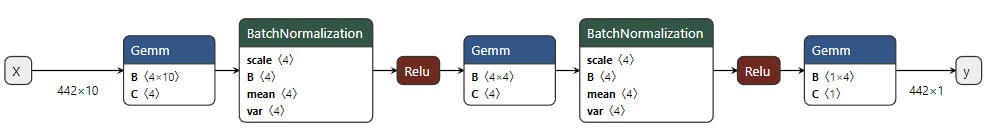

In [ ]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)
y = (y - y.mean())/y.std()

In [ ]:
X.shape

torch.Size([442, 10])

In [ ]:
crit = nn.MSELoss()
n_epochs = 40
r2_scores = []

for gamma in [0.001, 0.01, 0.1]:
  r2_score_per_model = []
  model = nn.Sequential(
      nn.Linear(X.shape[1], 4),
      nn.ReLU(),
      nn.Linear(4, 4),
      nn.ReLU(),
      nn.Linear(4, 1)
  )
  optimizer = optim.SGD(model.parameters(), lr=gamma)
  for epoch in range(n_epochs):
    y_pred = model(X)
    loss = crit(y_pred, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    r2_score_per_model.append(r2_score(y.detach().numpy(), y_pred.detach().numpy()))
  r2_scores.append(r2_score_per_model)

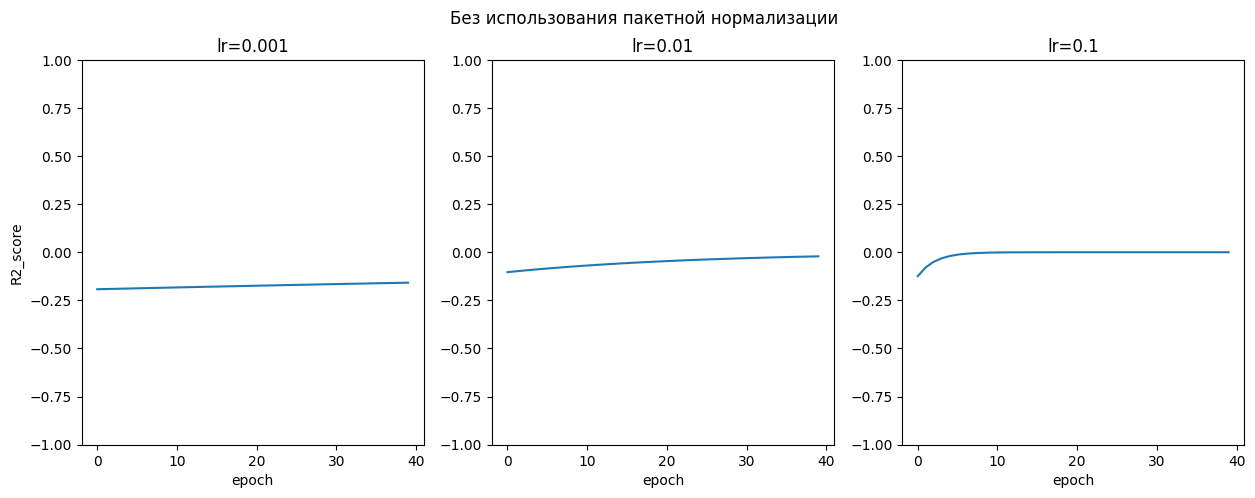

In [ ]:
fig, axs = plt.subplots(1, 3,  figsize=(15, 5))
fig.suptitle('Без использования пакетной нормализации')
axs[0].set_ylabel('R2_score')
lrs = [0.001, 0.01, 0.1]
for i in range(3):
  axs[i].plot(r2_scores[i])
  axs[i].set_title(f'lr={lrs[i]}')
  axs[i].set_xlabel('epoch')
  axs[i].set_ylim([-1,1]);

In [ ]:
crit = nn.MSELoss()
n_epochs = 40
r2_scores = []

for gamma in [0.001, 0.01, 0.1]:
  r2_score_per_model = []
  model = nn.Sequential(
      nn.Linear(X.shape[1], 4),
      nn.BatchNorm1d(num_features=4),
      nn.ReLU(),
      nn.Linear(4, 4),
      nn.BatchNorm1d(num_features=4),
      nn.ReLU(),
      nn.Linear(4, 1)
  )
  optimizer = optim.SGD(model.parameters(), lr=gamma)
  for epoch in range(n_epochs):
    y_pred = model(X)
    loss = crit(y_pred, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    r2_score_per_model.append(r2_score(y.detach().numpy(), y_pred.detach().numpy()))
  r2_scores.append(r2_score_per_model)

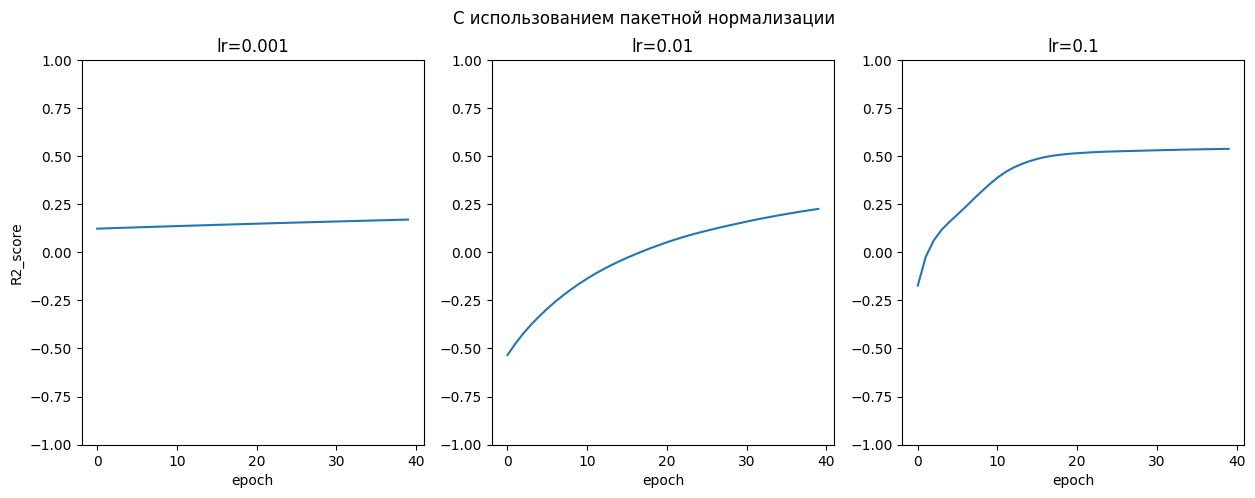

In [ ]:
fig, axs = plt.subplots(1, 3,  figsize=(15, 5))
fig.suptitle('С использованием пакетной нормализации')
axs[0].set_ylabel('R2_score')
lrs = [0.001, 0.01, 0.1]
for i in range(3):
  axs[i].plot(r2_scores[i])
  axs[i].set_title(f'lr={lrs[i]}')
  axs[i].set_xlabel('epoch')
  axs[i].set_ylim([-1,1]);

<p class="task" id="5"></p>

5\. Решите задачу регрессии c использованием различных алгоритмов градиентного спуска. Покажите, как меняется результат обучения моделей при использовании различных алгоритмов (Adam, Adagram, RMSProp, SGD) за одно и то же количество эпох с одной и той же скоростью обучения.

Визуализируйте график изменения значений MAPE в зависимости от эпохи при использовании различных алгоритмов градиентного спуска.

![image.png](attachment:image.png)

- [ ] Проверено на семинаре

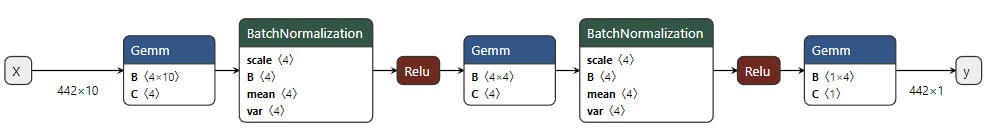

In [ ]:
def load_boston():
    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    return data, target

In [ ]:
X, y = load_boston()
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
crit = nn.MSELoss()
n_epochs = 40
mape_scores = []
model = nn.Sequential(
      nn.Linear(X.shape[1], 4),
      nn.BatchNorm1d(num_features=4),
      nn.ReLU(),
      nn.Linear(4, 4),
      nn.BatchNorm1d(num_features=4),
      nn.ReLU(),
      nn.Linear(4, 1)
  )
optims = [optim.Adam(model.parameters(), lr=0.01),
          optim.Adagrad(model.parameters(), lr=0.01),
          optim.RMSprop(model.parameters(), lr=0.01),
          optim.SGD(model.parameters(), lr=0.01)]

for opt in optims:
  mape_score_per_model = []
  optimizer = opt
  for epoch in range(n_epochs):
    y_pred = model(X)
    loss = crit(y_pred, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    mape_score_per_model.append(mean_absolute_percentage_error(y.detach().numpy(), y_pred.detach().numpy()))
  mape_scores.append(mape_score_per_model)

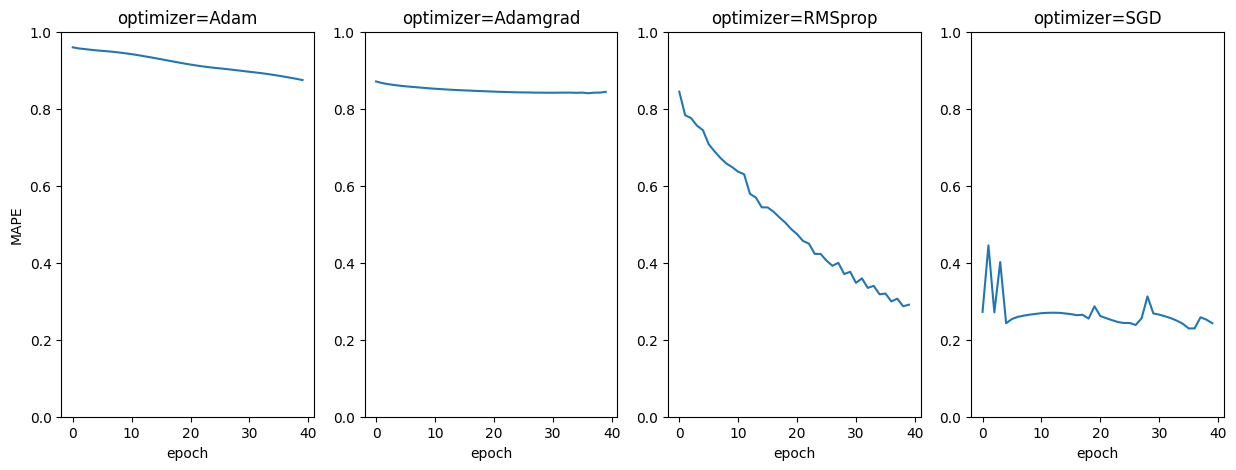

In [ ]:
fig, axs = plt.subplots(1, 4,  figsize=(15, 5))
axs[0].set_ylabel('MAPE')
lrs = ['Adam', 'Adamgrad', 'RMSprop', 'SGD']
for i in range(4):
  axs[i].plot(mape_scores[i])
  axs[i].set_title(f'optimizer={lrs[i]}')
  axs[i].set_xlabel('epoch')
  axs[i].set_ylim([0,1]);

<p class="task" id="6"></p>

6\. Решите задачу регрессии c использованием ранней остановки. Разбейте набор данных на обучающую и валидационную выборку в соотношении 80 на 20. Остановите процесс обучения, если целевая метрика (MAPE) не увеличивалась в течении последних $k$ ($k$ - гиперпараметр метода) эпох. В момент остановки выведите сообщение с текущим номером эпохи.

- [ ] Проверено на семинаре

In [294]:
X, y = load_boston()
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)

In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [335]:
crit = nn.MSELoss()
n_epochs = 1000
gamma = 0.1
k = 5
best_mape = float('inf')
best_epoch = 0

model = nn.Sequential(
      nn.Linear(X.shape[1], 4),
      nn.ReLU(),
      nn.Linear(4, 1)
  )
optimizer = optim.SGD(model.parameters(), lr=gamma)

for epoch in range(n_epochs):
  y_pred = model(X_train)
  loss = crit(y_pred, y_train)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  cur_mape = mean_absolute_percentage_error(y_train.detach().numpy(), y_pred.detach().numpy())
  if cur_mape == best_mape:
        best_epoch += 1
        if best_epoch == k:
            print(f"На эпохе {epoch} процесс обучения остановлен.")
            break
  best_mape = cur_mape

На эпохе 132 процесс обучения остановлен.


## Обратная связь
- [x] Хочу получить обратную связь по решению